In [1]:
import os
os.chdir(os.path.abspath('..'))

from models.UNet import *
from config import (
    NUM_CLASSES,
    IMAGE_HEIGHT,
    IMAGE_WIDTH,
    TRAIN_IMG_DIR,
    TRAIN_MASK_DIR,
    DEVICE,
    CLASS_MAPPING,
)
from scripts.utils import *
from data.dataset import ClothingCoParsingDataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Loading the model

In [2]:
model = UNet(in_channels=3, out_channels=NUM_CLASSES)
print("Number of classes: ", NUM_CLASSES)
print("Class mapping: ", CLASS_MAPPING)
print("Class mapping names: ", CLASS_MAPPING_NAMING)

load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)

Number of classes:  7
Class mapping:  {0: [0], 1: [41], 2: [19], 3: [4, 5, 6, 8, 11, 13, 14, 22, 24, 26, 35, 38, 46, 48, 49, 50, 51, 54, 55], 4: [25, 27, 30, 31, 40, 42, 53], 5: [7, 12, 16, 21, 28, 32, 36, 39, 43, 44, 58], 6: [1, 2, 3, 9, 10, 15, 17, 18, 20, 23, 29, 33, 34, 37, 45, 47, 52, 56, 57]}
Class mapping names:  {0: 'Background', 1: 'Skin', 2: 'Hair', 3: 'Tops', 4: 'Bottoms', 5: 'Footwear', 6: 'Accessories'}
=> Loading checkpoint


# Loading and preparing the images

In [3]:
idx = 13

transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

dataset = ClothingCoParsingDataset(
    image_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    num_classes=NUM_CLASSES,
    transform=transform
)

image, one_hot_mask = dataset[idx]
one_hot_mask = torch.from_numpy(one_hot_mask).float()  # Convert mask to tensor
print(image.shape)
print(one_hot_mask.shape)

image = image.unsqueeze(0)
one_hot_mask = one_hot_mask.unsqueeze(0)
print(image.shape)
print(one_hot_mask.shape)

torch.Size([3, 384, 256])
torch.Size([7, 384, 256])
torch.Size([1, 3, 384, 256])
torch.Size([1, 7, 384, 256])


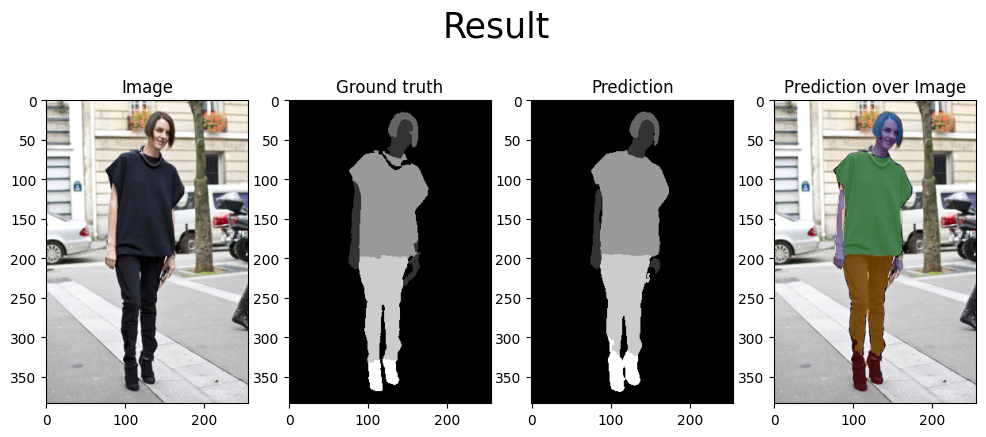

In [4]:
# Referencing: https://github.com/IzPerfect/Clothing-Segmentation/blob/master/test_segmentation.ipynb
show_result(model, image, one_hot_mask, title='Result', save_file=True, save_file_name='result.png', device=DEVICE)

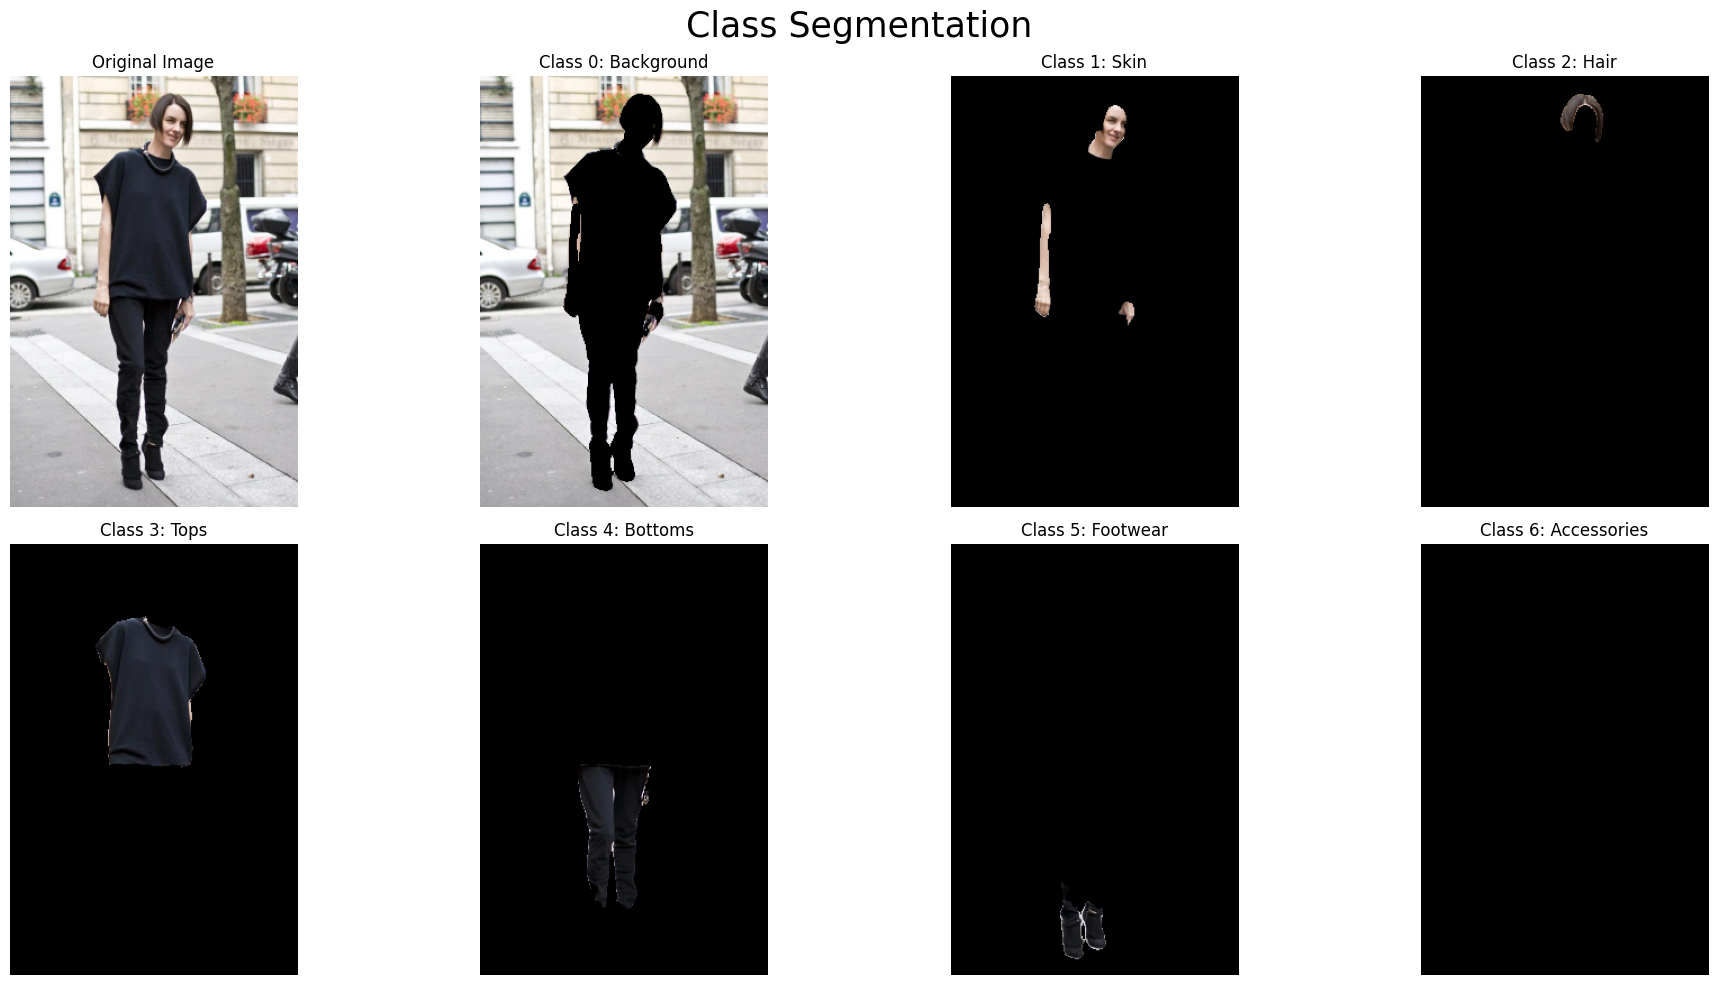

In [5]:
show_segmentation(model, image, title='Class Segmentation', save_file=True, save_file_name='segmentation.png', device=DEVICE)